## Exploration of olympic history data
 - Download the zip all CSVs from here: [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results).
 - Read the [dataset overview](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home)
 - Use pandas.ipynb from the videos as a reference - https://github.com/justmarkham/pandas-videos/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load athlete_events.csv into a datatrame called `df`

In [2]:
df = pd.read_csv('athlete_events.csv')

In [4]:
# Note, in this case the CSV file is in the same folder as the Jupyter notebook.
# You can use the !dir command to see the path to this notebook and other files in the same dir.
!dir

In [5]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Youngest and oldest participants
Note that the youngest participant was 10 and the oldest 97 ! Find who they are and what sports they cometed in. 
 - hint: read about idxmin() function

In [9]:
# Youngest participant
# Note that We must use `loc` to access the row, otherwise df[123] is trying to find a column called 123 and fails
df.loc[df.Age.idxmin()]

ID                                        71691
Name                         Dimitrios Loundras
Sex                                           M
Age                                          10
Height                                      NaN
Weight                                      NaN
Team              Ethnikos Gymnastikos Syllogos
NOC                                         GRE
Games                               1896 Summer
Year                                       1896
Season                                   Summer
City                                     Athina
Sport                                Gymnastics
Event     Gymnastics Men's Parallel Bars, Teams
Medal                                    Bronze
Name: 142882, dtype: object

In [10]:
# Oldest participant
# Note that df.Age and df['Age'] are the same thing
df.loc[df['Age'].idxmax()]

ID                                             128719
Name                           John Quincy Adams Ward
Sex                                                 M
Age                                                97
Height                                            NaN
Weight                                            NaN
Team                                    United States
NOC                                               USA
Games                                     1928 Summer
Year                                             1928
Season                                         Summer
City                                        Amsterdam
Sport                                Art Competitions
Event     Art Competitions Mixed Sculpturing, Statues
Medal                                             NaN
Name: 257054, dtype: object

### How many unique athletes are listed in the dataset?

In [12]:
df.ID.nunique()

135571

In [14]:
# Note that number of unique names is slightly lower. A bonus question, what's the most popular full name in the dataset?
df.Name.nunique()

134732

### How many unique athletes got any medals?

In [15]:
df[df.Medal.notnull()].ID.nunique()

28251

### How many medals of each type were awarded?

In [19]:
df.groupby('Medal').ID.count()
# Note that we could replace ID with any field that has no missing values, the count would be the same.

Medal
Bronze    13295
Gold      13372
Silver    13116
Name: ID, dtype: int64

In [25]:
# Checking that ID indeed has no missing values.
df.ID.isnull().any()

False

### Waht's the newest olympic sport in this dataset?

In [33]:
year_sport_first_appeared = df.groupby('Sport').Year.min()
year_sport_first_appeared.head()

Sport
Aeronautics         1936
Alpine Skiing       1936
Alpinism            1924
Archery             1900
Art Competitions    1912
Name: Year, dtype: int64

In [35]:
# Now we can either sort by the year and list several newest sports
year_sport_first_appeared.sort_values(ascending=False).head()

Sport
Rugby Sevens    2016
Triathlon       2000
Trampolining    2000
Taekwondo       2000
Snowboarding    1998
Name: Year, dtype: int64

In [38]:
# Or just get the sport where the year of first appearance is the highest using idxmax()
# Note, that after groupby('Sports').min() the index of the resulting DataFrame is Sports - the field groupped by,
# therefore idxmax returns the sports name.
year_sport_first_appeared.idxmax()

'Rugby Sevens'

### What sport had the most participants in the latest summer games?

In [46]:
# When were the last summer games
df[df.Season=='Summer'].Year.max()

2016

In [48]:
# Let's keep the subset of data about the last summer games in a separate DataFrame
last_summer = df[(df.Year==2016) & (df.Season=='Summer')]
# The check for season==summer is redundant because nowadays the summer and winter 
# games don't happen in the same year, but was not always the case.
last_summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [52]:
last_summer.groupby('Sport').ID.count().sort_values(ascending=False)
# Again, we could use idxmax(), but this way we get a better feel for relative popularity of
# different sports and what sports there are.

Sport
Athletics                2508
Swimming                 1568
Gymnastics                861
Cycling                   667
Shooting                  555
Rowing                    550
Football                  473
Canoeing                  441
Hockey                    390
Judo                      389
Sailing                   380
Equestrianism             355
Handball                  353
Fencing                   346
Wrestling                 346
Rugby Sevens              299
Tennis                    286
Volleyball                283
Boxing                    283
Basketball                281
Water Polo                258
Weightlifting             255
Table Tennis              236
Archery                   200
Diving                    178
Badminton                 177
Taekwondo                 126
Golf                      120
Synchronized Swimming     118
Triathlon                 110
Rhythmic Gymnastics        96
Beach Volleyball           96
Modern Pentathlon          72
Tram

### List all the cities that hosted any olympic games more than once

In [56]:
games_count = df.groupby('City').Year.nunique()
games_count.head()

City
Albertville    1
Amsterdam      1
Antwerpen      1
Athina         3
Atlanta        1
Name: Year, dtype: int64

In [57]:
games_count[games_count>=2]

City
Athina          3
Innsbruck       2
Lake Placid     2
London          3
Los Angeles     2
Paris           2
Sankt Moritz    2
Stockholm       2
Name: Year, dtype: int64

### Plot histograms of Age, Height and Weight of athletes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CAFE70320>,
      dtype=object)

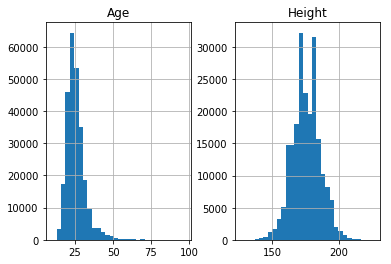

In [67]:
df.hist(['Age', 'Height'], bins=30)

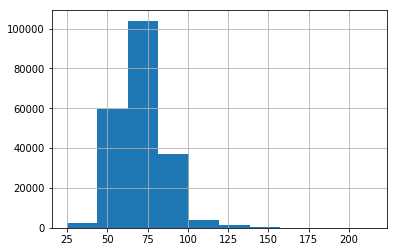

In [131]:
# We can first select the column(s) and then call .hist() on the resulting pd.Series object, both ways work ok
df.Weight.hist()

### Plot the histograms again, but separately for men and women

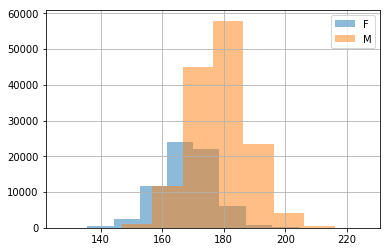

In [77]:
df_f = df[df.Sex=='F']
df_m = df[df.Sex=='M']
df_f.Height.hist(alpha=0.5, label='F')
df_m.Height.hist(alpha=0.5, label='M')
plt.legend()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CB0FDE2E8>,
      dtype=object)

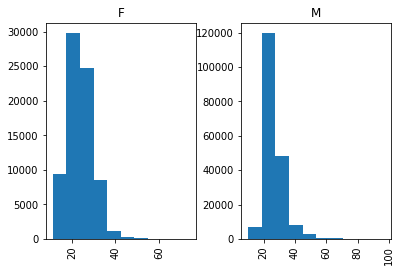

In [79]:
# There is also the `by` keyword, but in this case it's more informative to have both histograms on the same axes.
df.hist('Age', by='Sex')

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


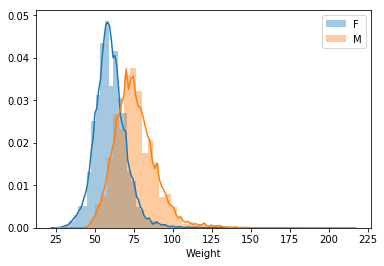

In [130]:
# In the next lectures we will talk a bit more about Seaborn library which provides a slightly 
# better looking version of such histograms via sns.distplot()
# Displot is normalized to the total number of points, this way we don't get the large difference 
# between the total heights of the histograms which makes it easier to concentrate on the difference 
# in distributions of athlete weight.
sns.distplot(df_f.Weight.dropna(), label='F') 
sns.distplot(df_m.Weight.dropna(), label='M') 
plt.legend()
# The pink text is a deprecation warning from Matplotlib which should be fixed in future versions of Seaborn.

### Here is an attempt to plot the number of participants as a function of year. What happaned in mid 1990s that makes this graph look so weird? Plot a more useful graph (or several)

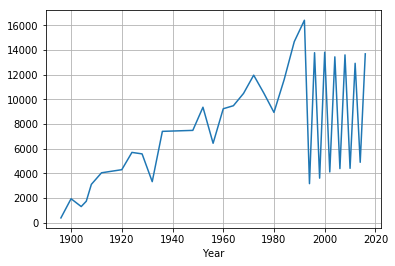

In [61]:
df.groupby(['Year'])['ID'].count().plot()
plt.grid()

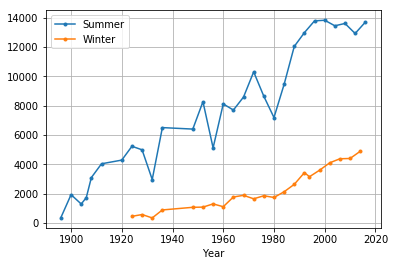

In [128]:
# The summer and winter games were held in the same year until 1994.
# Until 1994 we get the total number of participants from both winter and summer games of that yer.
# After 1994 we see the line jumping between the alternating number for summer and winter games.
# Here is a plot of summer and winter games separately
for season in ['Summer', 'Winter']:
    df[df.Season==season].groupby('Year').ID.count().plot(label=season, marker='.')
plt.legend()
plt.grid()

### Plot the average height of participants as a function of year - did they grow taller during the last century? (population on average did)

Text(0,0.5,'Averabe height of participants')

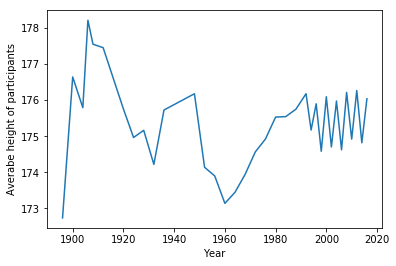

In [109]:
df.groupby('Year').Height.mean().plot()
plt.ylabel('Averabe height of participants')
# Looks like they didn't grow
# There seems to be a notable dip in 1960
# And we can see again the alternating values after 1994 for the winter and summer games

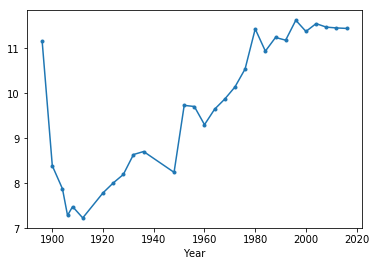

In [126]:
# But the variance of heights did grow quite a lot. Except it was interestingly high in the first games. 
# Something that might be interesting to investigate (could be due to the much lower number of participants in the first years)
df[df.Season=='Summer'].groupby('Year').Height.std().plot(marker='.')

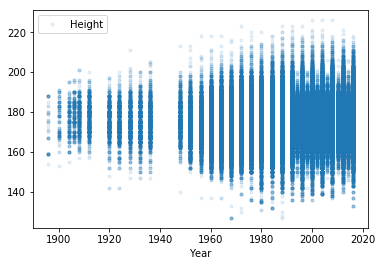

In [127]:
# An illustration of the growing variance of athelete heights
# This is a fairly poor illustration, though (suggest your improvements)
df.plot(x='Year', y='Height', marker='.', linestyle='', alpha=0.1)

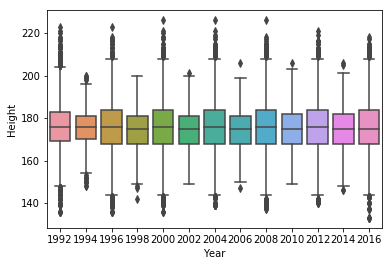

In [124]:
# We will talk about box and violin plots later. This box plot clearly shows 
# that the variance of height in summer games is much larger compared to winter games.
sns.boxplot(data=df[df.Year>1990], x='Year', y='Height')

In [155]:
# Height in different sports since 1980
heights = df[df.Height.notnull()].groupby('Sport').Height.mean().sort_values()
heights

Sport
Gymnastics                   162.936020
Trampolining                 166.582781
Diving                       166.634264
Weightlifting                167.824801
Rhythmic Gymnastics          167.870253
Figure Skating               168.202160
Synchronized Swimming        168.481481
Softball                     169.395089
Short Track Speed Skating    170.108199
Freestyle Skiing             171.012959
Table Tennis                 171.253773
Wrestling                    172.358586
Boxing                       172.825688
Snowboarding                 173.085561
Archery                      173.203085
Cross Country Skiing         173.249185
Hockey                       173.359676
Alpine Skiing                173.489052
Shooting                     173.572174
Triathlon                    173.645833
Lacrosse                     174.000000
Biathlon                     174.034766
Speed Skating                174.083352
Badminton                    174.178803
Judo                         174.1